In [ ]:
# I'll be using this python notebook to work through 

In [1]:
source('http://bioconductor.org/biocLite.R')
biocLite('phyloseq')

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘phyloseq’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'ade4', 'ape', 'bindrcpp', 'bit', 'blob', 'cli', 'cluster',
  'curl', 'data.table', 'DBI', 'devtools', 'digest', 'dplyr', 'evaluate',
  'foreign', 'Formula', 'futile.options', 'GenomicAlignments', 'ggplot2',
  'git2r', 'glue', 'gmp', 'highr', 'htmlTable', 'htmlwidgets', 'igraph',
  'IRdisplay', 'iterators', 'lambda.r', 'MASS', 'Matrix', 'matrixStats',
  'mgcv', 'mime', 'munsell', 'nlme', 'openssl', 'pbdZMQ', 'pillar',
  'pkgconfig', 'plogr', 'plotrix', 'R6', 'Rcpp', 'RcppArmadillo',
  'RcppParallel', 'RCurl', 'repr', 'rlang', 'RSQLite', 'rstudioapi', 'scales',
  'se

In [24]:
source("http://bioconductor.org/biocLite.R")
biocLite("DESeq2")


Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘DESeq2’
also installing the dependencies ‘XML’, ‘annotate’, ‘genefilter’, ‘geneplotter’

Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘XML’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘annotate’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘genefilter’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘geneplotter’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘DESeq2’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... do

In [1]:
install.packages('XML', dependencies=TRUE)
install.packages('annotate', dependencies=TRUE)
install.packages('genefilter', dependencies=TRUE)
install.packages('geneplotter', dependencies=TRUE)




In [ ]:
install.packages(c('cooccur', 'ecodist', 'png', 'randomcoloR', 'plotrix', 'colorRamp', 'VennDiagram'))

In [2]:
## loading required packages
library('phyloseq')
#library('DESeq2')
library('repr')
library('vegan')
library('cooccur')
library('igraph')
library('ecodist')
library('ade4')
library('png')
library('RColorBrewer')
#library('randomcoloR')
library('plotrix')
#library('colorRamp')
library('ggplot2')
library('VennDiagram')
library('dplyr')
library('reshape2')

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-6

Attaching package: ‘igraph’

The following object is masked from ‘package:vegan’:

    diversity

The following object is masked from ‘package:permute’:

    permute

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘ecodist’

The following object is masked from ‘package:vegan’:

    mantel

The following object is masked from ‘package:phyloseq’:

    distance

Loading required package: grid
Loading required package: futile.logger

Attaching package: ‘dplyr’

The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# if using R kernel
setwd('/Users/grahambailes/grass_endophyte_community/alt_biom/mock_community/')

In [3]:
## if using bash kernel
cd /Users/grahambailes/grass_endophyte_community/alt_biom/mock_community/

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: ## if using bash kernel
2: cd /Users/grahambailes/grass_endophyte_community/alt_biom/mock_community/
  ^


In [4]:
grass_biom <-import_biom('grass_97_wmeta_2019.biom', parseFunction=parse_taxonomy_greengenes)

In [4]:
grass_biom

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3880 taxa and 162 samples ]
sample_data() Sample Data:       [ 162 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 3880 taxa by 7 taxonomic ranks ]

## controls

We included a series of controls through our sequencing and bioinformatics pipeline inorder to shine light on any biases that may have occured through the process of dna extraction, amplification, sequencing, or curating our sequnces.  Here we will examine our negative control (sterile water that was processed alongside our samples, introduces durring the DNA extraction process), and three posotive controls.  1) pure culture of Xylaria hypoxylon, 2) a 24 species mock community which included known amounts of genomic DNA, and 3) the same mock community, only using ITS-pcr products.

In [5]:
#negative controls
neg97 <- subset_samples(grass_biom, samplename == 'negative')

In [13]:
neg97

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3881 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 3881 taxa by 7 taxonomic ranks ]

In [14]:
# number of reads
sum(taxa_sums(neg97)[taxa_sums(neg97)>0])

[1] 17788

In [15]:
# number of OTUs
length(taxa_sums(neg97)[taxa_sums(neg97)>0])

[1] 70

In [6]:
# which OTUs?
(taxa_sums(neg97)[taxa_sums(neg97)>0])

OTU2:5grass      OTU1:5grass     OTU16:5grass      OTU4:5grass 
               5               11                2                6 
    OTU27:5grass      OTU3:5grass   OTU149:25grass      OTU5:5grass 
               1                8                1                4 
 OTU1306:80grass      OTU6:5grass      OTU7:5grass     OTU12:5grass 
               1                1                4                2 
    OTU20:5grass     OTU47:6grass     OTU10:5grass    OTU279:5grass 
               1                1                3                1 
    OTU44:5grass    OTU103:5grass     OTU31:7grass     OTU15:5grass 
               1                1                1                1 
    OTU17:5grass     OTU41:5grass     OTU35:5grass   OTU216:21grass 
               2                1                1                2 
    OTU64:5grass     OTU38:5grass     OTU28:5grass   OTU2005:5grass 
               1                1                1                1 
    OTU42:5grass OTU2061:110grass     OTU34:7grass    OTU82:15grass 
            3810                1                2                1 
   OTU50:14grass   OTU288:11grass    OTU169:8grass    OTU186:6grass 
               1                1                1                1 
    OTU51:7grass    OTU323:7grass     OTU36:8grass    OTU100:7grass 
               1              667                6                1 
 OTU1219:81grass     OTU57:8grass    OTU555:9grass   OTU178:17grass 
               1                1               52               47 
 OTU2390:54grass    OTU23:13grass    OTU88:16grass   OTU260:26grass 
               1                3                1               11 
   OTU95:14grass    OTU76:14grass   OTU206:15grass    OTU87:15grass 
            4803                1                1             1172 
  OTU106:15grass  OTU273:158grass   OTU363:19grass   OTU209:28grass 
               1             1437              256                1 
  OTU834:28grass   OTU405:31grass  OTU339:148grass   OTU477:40grass 
             151                1             1014              644 
 OTU955:108grass   OTU278:64grass   OTU715:64grass  OTU2261:79grass 
              85             1318              305                1 
 OTU1791:85grass OTU2351:163grass   OTU484:95grass  OTU570:129grass 
               2                9              532              426 
 OTU459:163grass  OTU666:163grass 
             672              280

In [30]:
tax_table(neg97)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU2:5grass,Fungi,Ascomycota,Sordariomycetes,Hypocreales,Hypocreales_fam_Incertae_sedis,Sarocladium,NA
OTU1:5grass,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Davidiellaceae,Davidiella,Davidiella_tassiana_SH216250.07FU
OTU16:5grass,Fungi,Ascomycota,Dothideomycetes,Capnodiales,NA,NA,NA
OTU263:5grass,Fungi,Ascomycota,Leotiomycetes,Helotiales,Dermateaceae,Dermea,Dermea_ariae_SH201690.07FU
OTU4:5grass,Fungi,Ascomycota,Sordariomycetes,Sordariomycetidae_ord_Incertae_sedis,Glomerellaceae,Glomerella,NA
OTU1265:13grass,Fungi,Ascomycota,Sordariomycetes,Sordariomycetidae_ord_Incertae_sedis,Glomerellaceae,Glomerella,NA
OTU127:23grass,Fungi,Ascomycota,Dothideomycetes,Pleosporales,Phaeosphaeriaceae,NA,NA
OTU1202:12grass,Fungi,Ascomycota,Sordariomycetes,Sordariomycetidae_ord_Incertae_sedis,Glomerellaceae,Glomerella,NA
OTU9:5grass,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Davidiellaceae,Cladosporium,Cladosporium_exasperatum_SH422672.07FU
OTU13:5grass,Fungi,Ascomycota,Leotiomycetes,Erysiphales,Erysiphaceae,Blumeria,Blumeria_graminis_SH205386.07FU


In [53]:
## run in R terminal
## create tesx file of otus
reads <- taxa_sums(neg97)[taxa_sums(neg97) > 0]
reads <- sort(reads, decreasing = TRUE)
sink('neg97names.txt')
names(reads)
sink()

[1] "OTU95:14grass"    "OTU42:5grass"     "OTU273:158grass"  "OTU278:64grass"  
 [5] "OTU87:15grass"    "OTU339:148grass"  "OTU459:163grass"  "OTU323:7grass"   
 [9] "OTU477:40grass"   "OTU484:95grass"   "OTU570:129grass"  "OTU715:64grass"  
[13] "OTU666:163grass"  "OTU363:19grass"   "OTU834:28grass"   "OTU955:108grass" 
[17] "OTU555:9grass"    "OTU178:17grass"   "OTU1:5grass"      "OTU260:26grass"  
[21] "OTU2351:163grass" "OTU3:5grass"      "OTU4:5grass"      "OTU36:8grass"    
[25] "OTU2:5grass"      "OTU5:5grass"      "OTU7:5grass"      "OTU10:5grass"    
[29] "OTU23:13grass"    "OTU16:5grass"     "OTU12:5grass"     "OTU17:5grass"    
[33] "OTU216:21grass"   "OTU34:7grass"     "OTU1791:85grass"  "OTU27:5grass"    
[37] "OTU149:25grass"   "OTU1306:80grass"  "OTU6:5grass"      "OTU20:5grass"    
[41] "OTU47:6grass"     "OTU279:5grass"    "OTU44:5grass"     "OTU103:5grass"   
[45] "OTU31:7grass"     "OTU15:5grass"     "OTU41:5grass"     "OTU35:5grass"    
[49] "OTU64:5grass"     "OTU38:5grass"     "OTU28:5grass"     "OTU2005:5grass"  
[53] "OTU2061:110grass" "OTU82:15grass"    "OTU50:14grass"    "OTU288:11grass"  
[57] "OTU169:8grass"    "OTU186:6grass"    "OTU51:7grass"     "OTU100:7grass"   
[61] "OTU1219:81grass"  "OTU57:8grass"     "OTU2390:54grass"  "OTU88:16grass"   
[65] "OTU76:14grass"    "OTU206:15grass"   "OTU106:15grass"   "OTU209:28grass"  
[69] "OTU405:31grass"   "OTU2261:79grass"

In [22]:
## bash kernel - using command terminal
## clean up a little with SED 
#sed 's/\[.*\]//g' neg97names.txt |sed 's/^\s*//g' | sed 's/\s\+/,/g' | sed '$s/,$/\)/' | sed '1s/\"OTU/\(\"OTU/' > neg97list.txt

In [ ]:
## python3 - This is a python script that dan wrote to create query sequences for our negative control sequences

## this is a python program titled: mock_list_xyl.py


##command line application
#to make file run-able
# $chmod +x script_name
# to run the script, use ./ before the script name

#! /usr/bin/env python3
from sys import argv
from glob import glob
import os

mcseq = ("OTU95:14grass","OTU42:5grass","OTU273:158grass", 
  "OTU278:64grass","OTU87:15grass","OTU339:148grass", 
  "OTU459:163grass","OTU323:7grass","OTU477:40grass",  
 "OTU484:95grass","OTU570:129grass","OTU715:64grass",  
 "OTU666:163grass","OTU363:19grass","OTU834:28grass",  
 "OTU955:108grass","OTU555:9grass","OTU178:17grass",  
 "OTU1:5grass","OTU260:26grass","OTU2351:163grass",
 "OTU3:5grass","OTU4:5grass","OTU36:8grass",    
 "OTU2:5grass","OTU5:5grass","OTU7:5grass",     
 "OTU10:5grass","OTU23:13grass","OTU16:5grass",    
 "OTU12:5grass","OTU17:5grass","OTU216:21grass",  
 "OTU34:7grass","OTU1791:85grass","OTU27:5grass",    
 "OTU149:25grass","OTU1306:80grass","OTU6:5grass",     
 "OTU20:5grass","OTU47:6grass","OTU279:5grass", 
 "OTU44:5grass","OTU103:5grass","OTU31:7grass",    
 "OTU15:5grass","OTU41:5grass","OTU35:5grass",    
 "OTU64:5grass","OTU38:5grass","OTU28:5grass",    
 "OTU2005:5grass","OTU2061:110grass","OTU82:15grass",   
 "OTU50:14grass","OTU288:11grass","OTU169:8grass",   
 "OTU186:6grass","OTU51:7grass","OTU100:7grass",   
 "OTU1219:81grass","OTU57:8grass","OTU2390:54grass", 
 "OTU88:16grass","OTU76:14grass","OTU206:15grass",  
 "OTU106:15grass","OTU209:28grass","OTU405:31grass",  
 "OTU2261:79grass") 

 with open('otus_97_uclust_ass_tax.fasta', 'r') as zoop:
         refseq = zoop.readlines()

 with open('mcseq.txt', 'w') as goop:
         for j,otu in enumerate(mcseq):
                 for i,line in enumerate(refseq):
                         if mcseq[j] in line:
                                 goop.write(line)
                                 for l in refseq[i+1:i+5]:
                                         if ">" in l:
                                                 goop.write('\n')
                                                 break
                                         goop.write(l)

In [6]:
## we will use the sanger sequences from our mock community as a database to query against our negative control 
# make symbolic link to sanger sequences from mock community for use in blast search
ln -s /Users/grahambailes/grass_endophyte_community/alt_biom/mock_community/BioI-6098_OConnor_34875/BioI-6098_OConnor_34875.seq.txt mcsanger.fasta
## make databast for blasting
makeblastdb -in mcsanger.fasta -dbtype nucl -logfile dberrors.txt

ERROR: Error in parse(text = x, srcfile = src): <text>:3:86: unexpected input
2: # make symbolic link to sanger sequences from mock community for use in blast search
3: ln -s /Users/grahambailes/grass_endophyte_community/alt_biom/mock_community/BioI-6098_
                                                                                        ^


In [ ]:
## Shell kernel
## reformat, blast.  The two outpouts are: 1) human readable, and 2)a summary csv to use in R
sed '/^>/ s/;size=.*//' mcseq.txt | sed '/^>/ s/;size=.*//' mcseq.txt > mockseqs_Neg97.fasta
blastn -query mockseqs_Neg97.fasta -db mcsanger.fasta -out mcblast_Neg97.txt -num_descriptions 3 -num_alignments 3
blastn -query mockseqs_Neg97.fasta -db mcsanger.fasta -out mcblast_Neg97.csv -outfmt 10 -max_target_seqs 1

## can't get these final three to work yet - maybe its not important...
sed -i '' '1i\
qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
' mcblast_Neg97.csv 
sed -i '' 's/_ITS[1,4],/,/g' mcblast_Neg97.csv 
sed -i '' 's/Sample//g' mcblast_Neg97.csv 

In [54]:
## in R (jupyter)
library('phyloseq')
blast <- read.csv('mcblast_Neg97.csv', stringsAsFactors = FALSE)
blast
## query id, reference genome id, % identical match, length, # mismatches, # gap openings, start of alignment in query,
# end of alignment in query, start of alignment in reference, end of alignment in reference, expected value, bit score

## evalue (# expected hits possible by chance) can be used as a quality filter -  
# evalue < 1e-50 -> high quality matches, 1e-50 < evalue < 0.01 -> good hit, 0.01 < evalue < 10 -> not significant
## higher bit score suggests better sequence similarity

qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
OTU42:5grass,16,100.00,180,0,0,1,180,502,323,2e-94,333.0
OTU87:15grass,6,100.00,184,0,0,1,184,535,352,1e-96,340.0
OTU715:64grass,6,100.00,32,0,0,29,60,561,530,4e-12,60.2
OTU23:13grass,16,95.24,63,3,0,1,63,502,440,2e-24,100.0
OTU12:5grass,16,93.33,60,3,1,2,61,501,443,2e-20,87.9
OTU20:5grass,19,80.22,182,20,10,2,175,512,339,4e-31,122.0
OTU15:5grass,7,100.00,193,0,0,1,193,524,332,1e-101,357.0
OTU38:5grass,7,93.81,113,7,0,40,152,459,347,1e-45,171.0
OTU50:14grass,8,100.00,143,0,0,1,143,451,309,5e-74,265.0
OTU169:8grass,13,82.32,181,24,8,1,176,492,315,2e-39,150.0


In [55]:
# we'll remove low confidence matches and short reads - hmm, this is interesting - removing
# the low 
goodblast <- blast[blast$pident > 94& blast$length > 90,]
goodblast

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
1,OTU42:5grass,16,100,180,0,0,1,180,502,323,2e-94,333
2,OTU87:15grass,6,100,184,0,0,1,184,535,352,1e-96,340
7,OTU15:5grass,7,100,193,0,0,1,193,524,332,1e-101,357
9,OTU50:14grass,8,100,143,0,0,1,143,451,309,5e-74,265
11,OTU76:14grass,12,100,178,0,0,1,178,501,324,2e-93,329
12,OTU106:15grass,19,100,175,0,0,1,175,513,339,1e-91,324


In [56]:
Neg97.gen <- tax_table(neg97)[names(reads), 6]
Neg97.gen[is.na(Neg97.gen)] <- 'NoID'
Neg97.species <- tax_table(neg97)[names(reads),7] ## species, from initial tax assignments
Neg97.species[is.na(Neg97.species)] <- "NoID"
member <- names(reads) %in% goodblast$qseqid ## membership in mock community (probably tag-switchers)
MC <- vector(length = length(reads)); MC[] <- 0 ## empty vector, for MC sample #, filled below
Neg97bar <- data.frame(reads, member, MC, Neg97.gen, Neg97.species, stringsAsFactors=FALSE) ## dataframe
##fill the mock community sample number by querying our csv from blast results
colnames(Neg97bar)[1] <- "reads"
for (i in 1:nrow(Neg97bar)){
        if (rownames(Neg97bar)[i] %in% goodblast$qseqid) {
                search <- grep(rownames(Neg97bar)[i], goodblast$qseqid)
                Neg97bar$MC[i] <- goodblast$sseqid[search]
        }
    }

In [35]:
Neg97bar

,reads,member,MC,Genus,Species
OTU95:14grass,4803,FALSE,0,NoID,NoID
OTU42:5grass,3810,TRUE,16,Xylaria,NoID
OTU273:158grass,1437,FALSE,0,NoID,NoID
OTU278:64grass,1318,FALSE,0,NoID,NoID
OTU87:15grass,1172,TRUE,6,Trametes,NoID
OTU339:148grass,1014,FALSE,0,NoID,NoID
OTU459:163grass,672,FALSE,0,Dentipellis,Dentipellis_fragilis_SH190187.07FU
OTU323:7grass,667,FALSE,0,Penicillium,Penicillium_bialowiezense_SH199400.07FU
OTU477:40grass,644,FALSE,0,Phlebiopsis,Phlebiopsis_gigantea_SH198804.07FU
OTU484:95grass,532,FALSE,0,NoID,NoID


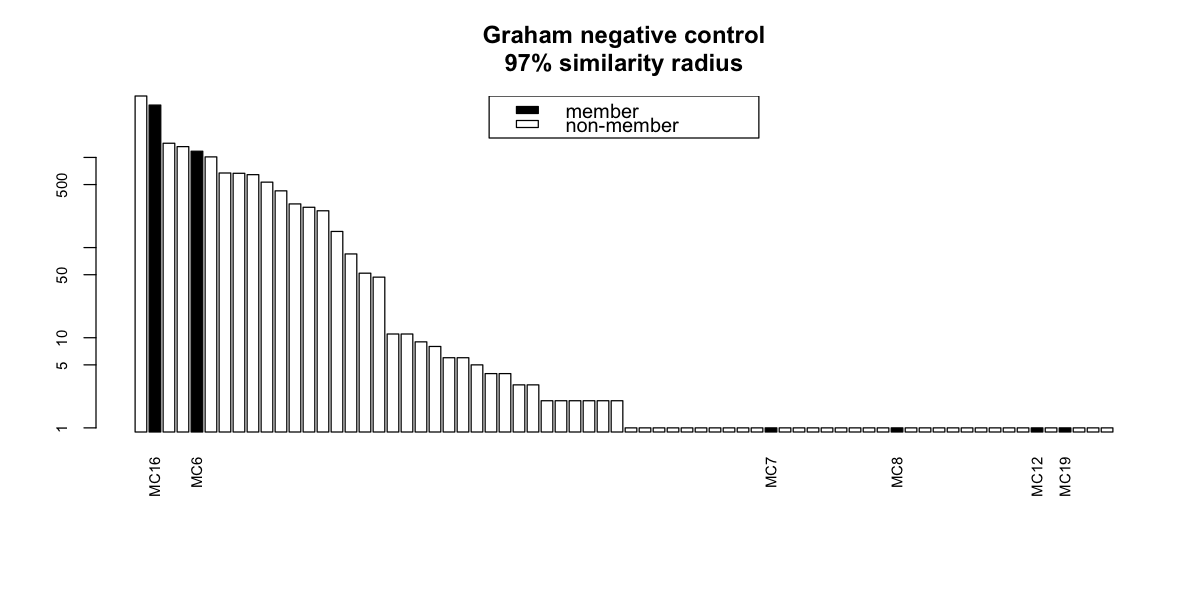

In [58]:
inout <- paste('MC', Neg97bar$MC, sep='')
inout[inout=='MC0'] <- NA

#svg('negative_cont.svg')
par(cex.axis = .75, mar=c(7,4,4,2))
barplot(Neg97bar$reads,las=3,log='y', names.arg=inout, col = member,
       main = 'Graham negative control\n97% similarity radius')
legend("top", legend=c('member','non-member'), fill=c(1,0))
#dev.off()

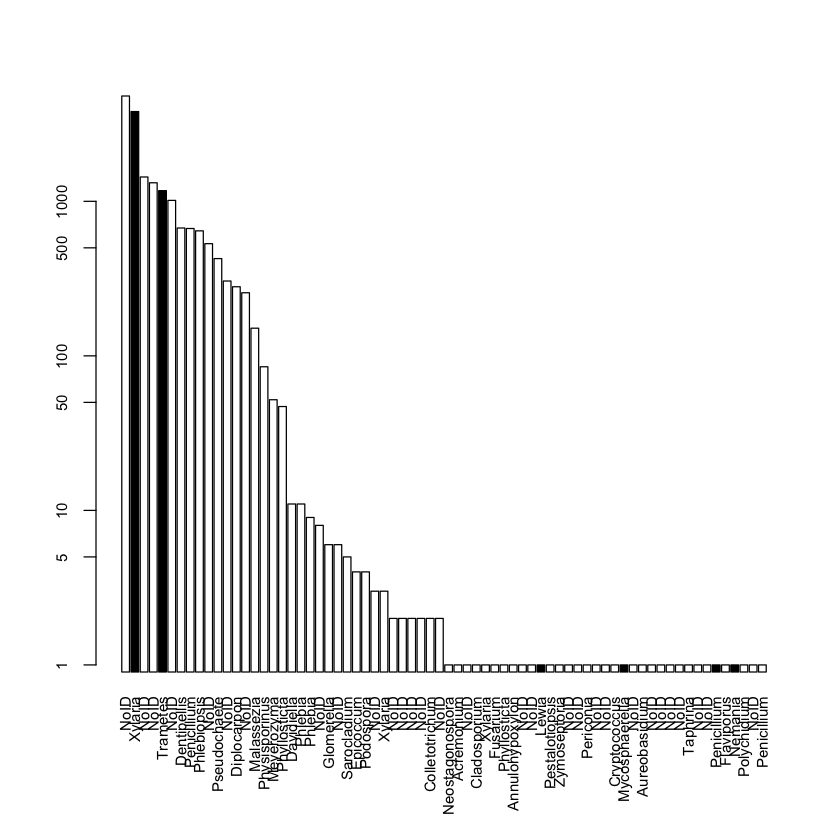

In [11]:
par(cex.axis = .75, mar=c(7,4,4,2))
barplot(Neg97bar$reads,las=3,log='y', names.arg=Neg97bar$Genus, col = member)

In [12]:
## lets see what the more common contaminants are
tax_table(neg97)[which(rownames(tax_table(neg97)) =='OTU95:14grass')]
otu_table(neg97)[which(rownames(otu_table(neg97)) =='OTU95:14grass')]

tax_table(neg97)[which(rownames(tax_table(neg97)) =='OTU273:158grass')]
otu_table(neg97)[which(rownames(otu_table(neg97)) =='OTU273:158grass')]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU95:14grass,Fungi,Ascomycota,Sordariomycetes,Hypocreales,Nectriaceae,NA,NA


,163grass
OTU95:14grass,4803


,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU273:158grass,Fungi,Basidiomycota,Agaricomycetes,Atheliales,Atheliaceae,NA,NA


,163grass
OTU273:158grass,1437


In [ ]:
## these figures show our negative controls, while members of our mock community are displayed in dark bars.  

## now lets look at our positive controls



In [59]:
library('phyloseq')
xyl.biom <- subset_samples(grass_biom, samplename == 'Pos_X')

In [39]:
xyl.biom

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3880 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 3880 taxa by 7 taxonomic ranks ]

In [40]:
sum(taxa_sums(xyl.biom)[taxa_sums(xyl.biom)>0])

[1] 71462

In [41]:
length(taxa_sums(xyl.biom)[taxa_sums(xyl.biom)>0])

[1] 55

In [27]:
taxa_sums(xyl.biom)[taxa_sums(xyl.biom)>0]

OTU2:5grass      OTU1:5grass      OTU9:5grass      OTU4:5grass 
               2                8                2                1 
    OTU13:5grass      OTU3:5grass      OTU5:5grass      OTU8:5grass 
               1                1                1                2 
 OTU610:105grass      OTU6:5grass    OTU126:5grass     OTU10:5grass 
               1                9                1                1 
  OTU264:19grass     OTU46:7grass     OTU22:6grass    OTU199:5grass 
               1                1                3                2 
    OTU15:5grass     OTU11:5grass    OTU380:5grass    OTU548:5grass 
               1                3                1                1 
   OTU482:5grass     OTU42:5grass   OTU185:18grass     OTU72:6grass 
               2                1                4                1 
   OTU109:7grass     OTU36:8grass   OTU133:11grass    OTU68:12grass 
               1                1                1                2 
   OTU23:13grass   OTU119:41grass    OTU87:15grass   OTU959:19grass 
           70990                1                6                2 
  OTU315:24grass   OTU791:26grass   OTU723:25grass  OTU1549:37grass 
               1                1                1               30 
 OTU2080:40grass  OTU1452:41grass OTU2361:160grass OTU1016:135grass 
               1                1                4                1 
 OTU1832:54grass   OTU760:62grass   OTU659:64grass OTU1302:126grass 
               2                1                4                3 
OTU1504:109grass  OTU626:109grass OTU1621:159grass OTU2101:160grass 
               1              318                1               14 
OTU3602:160grass OTU2230:160grass OTU3538:160grass OTU3415:160grass 
               2               10                2                3 
OTU3355:160grass OTU3394:160grass OTU3689:160grass 
               2                2                2

In [60]:
xyl.reads <- taxa_sums(xyl.biom)[taxa_sums(xyl.biom) > 0]
xyl.reads <- sort(xyl.reads, decreasing = TRUE)
sink('xyl.names.txt') ## read out these OTUs so we can use them in python env
names(xyl.reads)
sink()

[1] "OTU23:13grass"    "OTU626:109grass"  "OTU1549:37grass"  "OTU2101:160grass"
 [5] "OTU2230:160grass" "OTU6:5grass"      "OTU1:5grass"      "OTU87:15grass"   
 [9] "OTU185:18grass"   "OTU2361:160grass" "OTU659:64grass"   "OTU22:6grass"    
[13] "OTU11:5grass"     "OTU1302:126grass" "OTU3415:160grass" "OTU2:5grass"     
[17] "OTU9:5grass"      "OTU8:5grass"      "OTU199:5grass"    "OTU482:5grass"   
[21] "OTU68:12grass"    "OTU959:19grass"   "OTU1832:54grass"  "OTU3602:160grass"
[25] "OTU3538:160grass" "OTU3355:160grass" "OTU3394:160grass" "OTU3689:160grass"
[29] "OTU4:5grass"      "OTU13:5grass"     "OTU3:5grass"      "OTU5:5grass"     
[33] "OTU610:105grass"  "OTU126:5grass"    "OTU10:5grass"     "OTU264:19grass"  
[37] "OTU46:7grass"     "OTU15:5grass"     "OTU380:5grass"    "OTU548:5grass"   
[41] "OTU42:5grass"     "OTU72:6grass"     "OTU109:7grass"    "OTU36:8grass"    
[45] "OTU133:11grass"   "OTU119:41grass"   "OTU315:24grass"   "OTU791:26grass"  
[49] "OTU723:25grass"   "OTU2080:40grass"  "OTU1452:41grass"  "OTU1016:135grass"
[53] "OTU760:62grass"   "OTU1504:109grass" "OTU1621:159grass"

In [43]:

##command line application
#to make file run-able
# $chmod +x script_name
# to run the script, use ./ before the script name

#! /usr/bin/env python3
from sys import argv
from glob import glob
import os

mcseq_xyl=('OTU95:14grass' ,'OTU42:5grass', 'OTU273:158grass' ,'OTU278:64grass' ,'OTU87:15grass', 'OTU339:148grass' ,
 'OTU459:163grass' ,'OTU323:7grass', 'OTU477:40grass' ,'OTU484:95grass', 'OTU570:129grass', 'OTU715:64grass' ,
 'OTU666:163grass' ,'OTU363:19grass', 'OTU834:28grass' ,'OTU955:108grass' ,'OTU555:9grass', 'OTU178:17grass', 
 'OTU1:5grass', 'OTU260:26grass', 'OTU2351:163grass', 'OTU3:5grass', 'OTU4:5grass', 'OTU36:8grass', 'OTU2:5grass', 
 'OTU5:5grass', 'OTU7:5grass', 'OTU10:5grass' ,'OTU23:13grass', 'OTU16:5grass', 'OTU12:5grass' ,'OTU17:5grass' ,
 'OTU216:21grass', 'OTU34:7grass' ,'OTU1791:85grass', 'OTU27:5grass', 'OTU149:25grass', 'OTU1306:80grass', 
 'OTU6:5grass' ,'OTU20:5grass' ,'OTU47:6grass' ,'OTU279:5grass' ,'OTU44:5grass', 'OTU103:5grass', 'OTU31:7grass', 
 'OTU15:5grass' ,'OTU41:5grass', 'OTU35:5grass' ,'OTU64:5grass', 'OTU38:5grass', 'OTU28:5grass' ,'OTU2005:5grass', 
 'OTU2061:110grass', 'OTU82:15grass', 'OTU50:14grass', 'OTU288:11grass', 'OTU169:8grass', 'OTU186:6grass', 
 'OTU51:7grass', 'OTU100:7grass', 'OTU1219:81grass', 'OTU57:8grass', 'OTU2390:54grass', 'OTU88:16grass' ,
 'OTU76:14grass' ,'OTU206:15grass', 'OTU106:15grass', 'OTU209:28grass', 'OTU405:31grass', 'OTU2261:79grass')

 with open('otus_97_uclust_ass_tax.fasta', 'r') as zoop:
         refseq = zoop.readlines()

 with open('mcseq_xyl.txt', 'w') as goop:
         for j,otu in enumerate(mcseq_xyl):
                 for i,line in enumerate(refseq):
                         if mcseq_xyl[j] in line:
                                 goop.write(line)
                                 for l in refseq[i+1:i+5]:
                                         if ">" in l:
                                                 goop.write('\n')
                                                 break
                                         goop.write(l)

ERROR: Error: '\[' is an unrecognized escape in character string starting "'s/\["


In [1]:
## Shell kernel
## reformat, blast.  The two outpouts are: 1) human readable, and 2)a summary csv to use in R
sed '/^>/ s/;size=.*//' mcseq_xyl.txt | sed '/^>/ s/;size=.*//' mcseq_xyl.txt > mockseqs_xyl.fasta
blastn -query mockseqs_xyl.fasta -db mcsanger.fasta -out mcblast_xyl.txt -num_descriptions 3 -num_alignments 3
blastn -query mockseqs_xyl.fasta -db mcsanger.fasta -out mcblast_xyl.csv -outfmt 10 -max_target_seqs 1

## can't get these final three to work yet - maybe its not important...
sed -i '' '1 i\
qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
' mcblast_xyl.csv -i
sed -i '' 's/_ITS[1,4],/,/g' mcblast_xyl.csv
sed -i '' 's/Sample//g' mcblast_xyl.csv

sed: mcseq_xyl.txt: No such file or directory
sed: mcseq_xyl.txt: No such file or directory
BLAST Database error: No alias or index file found for nucleotide database [mcsanger.fasta] in search path [/Users/grahambailes/grass_endophyte_community::]
BLAST Database error: No alias or index file found for nucleotide database [mcsanger.fasta] in search path [/Users/grahambailes/grass_endophyte_community::]
sed: 1: "1 i\qseqid,sseqid,piden ...": extra characters after \ at the end of i command
sed: -i: No such file or directory
sed: -i: No such file or directory


: 1

In [61]:
blast <- read.csv('mcblast_xyl.csv', stringsAsFactors=FALSE)
colnames(blast) <- c('qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore')
blast

qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
OTU87:15grass,Sample6_ITS4,100.00,184,0,0,1,184,535,352,1e-96,340.0
OTU715:64grass,Sample6_ITS4,100.00,32,0,0,29,60,561,530,4e-12,60.2
OTU23:13grass,Sample16_ITS4,95.24,63,3,0,1,63,502,440,2e-24,100.0
OTU12:5grass,Sample16_ITS4,93.33,60,3,1,2,61,501,443,2e-20,87.9
OTU20:5grass,Sample19_ITS4,80.22,182,20,10,2,175,512,339,4e-31,122.0
OTU15:5grass,Sample7_ITS4,100.00,193,0,0,1,193,524,332,1e-101,357.0
OTU38:5grass,Sample7_ITS4,93.81,113,7,0,40,152,459,347,1e-45,171.0
OTU50:14grass,Sample8_ITS4,100.00,143,0,0,1,143,451,309,5e-74,265.0
OTU169:8grass,Sample13_ITS4,82.32,181,24,8,1,176,492,315,2e-39,150.0
OTU76:14grass,Sample12_ITS4,100.00,178,0,0,1,178,501,324,2e-93,329.0


In [ ]:
## looks like there were 11 sequences that were in our mock community.  

# lets get a visualization of reads for these, and get an idea whether or not they belong to our mock community

In [62]:
reads <- taxa_sums(xyl.biom)[taxa_sums(xyl.biom)>0] ## read abundances
reads <- sort(reads, decreasing = TRUE)
xyl.gen <- tax_table(xyl.biom)[names(reads),6] ## genus names
xyl.gen[is.na(xyl.gen)] <- "NoID" ## unidentified OTUs
xyl.species <- tax_table(xyl.biom)[names(reads),7] ## species names
xyl.species[is.na(xyl.species)] <- "NoID" ## unidentified OTUs
member <- names(reads) %in% blast$qseqid ## is the OTU one of our mock community members?
MC <- vector(length = length(reads)); MC[] <- 0 ## fill with zeroes
xyl_bar <- data.frame(reads, member, MC, xyl.gen,xyl.species, stringsAsFactors=FALSE)
## check our blast results for mock community sample number, if it's a member.
for (i in 1:nrow(xyl_bar)){
        if (rownames(xyl_bar)[i] %in% blast$qseqid) {
                search <- grep(rownames(xyl_bar)[i], blast$qseqid)
                xyl_bar$MC[i] <- blast$sseqid[search]
        }
    }

In [64]:
#svg('xyl_cont.svg')
options(repr.plot.width = 10, repr.plot.height = 7)
par(cex.axis = .75, mar=c(7,4,4,2))
barplot(xyl_bar$reads,las=3,log='y', names.arg=xyl_bar$Genus, col = member)
legend("top", legend=c('member','non-member'), fill=c(1,0))
#dev.off()

pdf 
  2

In [46]:
xyl.species

## Tag-switched species are likely.  Those bars in black (except for xylaria) seem to be the culprits.  Lets move on
# to compare the mock community with the sanger sequences

,Species
OTU23:13grass,Xylaria_hypoxylon_SH205537.07FU
OTU626:109grass,NoID
OTU1549:37grass,NoID
OTU2101:160grass,NoID
OTU2230:160grass,NoID
OTU6:5grass,Cladosporium_exasperatum_SH422672.07FU
OTU1:5grass,Davidiella_tassiana_SH216250.07FU
OTU87:15grass,NoID
OTU185:18grass,NoID
OTU2361:160grass,NoID


## mock community

we will follow the same pipleine to get an idea of what our mock community looks like at the end of our bioinformatics pipeline up to this point.

In [109]:
sample_data(grass_biom)

,SPRING.MEAN.TEMPERATURE,SUMMER.DEWPOINT.TEMPERATURE,ANNUAL.MIN.TEMPERATURE,SUMMER.MAX.TEMPERATURE,region,site_nr,bulk_density,y_coordinate,SampleNumber,percent_clay,⋯,percent_C,elevation,host,C_to_N,seeds_produced,SPRING.MIN.TEMPERATURE,WINTER.PRECIPITATION,ANNUAL.DEWPOINT.TEMPERATURE,SUMMER.MIN.TEMPERATURE,SPRING.MAX.TEMPERATURE
5grass,12.33,7.12,3.95,28.84,SOR,1,1.03,-68,1,30.2,⋯,2.17,448,F. roemeri,0.02,1143.61,4.12,262.31,4.25,7.37,20.54
6grass,12.33,7.12,3.95,28.84,SOR,1,1.03,-100,2,30.2,⋯,2.17,448,F. roemeri,0.02,1597.35,4.12,262.31,4.25,7.37,20.54
7grass,12.33,7.12,3.95,28.84,SOR,1,1.03,-88,3,30.2,⋯,2.17,448,F. roemeri,0.02,2648.36,4.12,262.31,4.25,7.37,20.54
8grass,12.33,7.12,3.95,28.84,SOR,1,1.03,57,4,30.2,⋯,2.17,448,F. roemeri,0.02,1583.46,4.12,262.31,4.25,7.37,20.54
9grass,12.33,7.12,3.95,28.84,SOR,1,1.03,-135,5,30.2,⋯,2.17,448,F. roemeri,0.02,1458.45,4.12,262.31,4.25,7.37,20.54
10grass,12.33,7.12,3.95,28.84,SOR,1,1.03,-96,6,30.2,⋯,2.17,448,F. roemeri,0.02,1444.56,4.12,262.31,4.25,7.37,20.54
11grass,12.33,7.12,3.95,28.84,SOR,1,1.03,-80,7,30.2,⋯,2.17,448,F. roemeri,0.02,2291.85,4.12,262.31,4.25,7.37,20.54
12grass,12.33,7.12,3.95,28.84,SOR,1,1.03,68,8,30.2,⋯,2.17,448,F. roemeri,0.02,333.36,4.12,262.31,4.25,7.37,20.54
13grass,12.33,7.12,3.95,28.84,SOR,1,1.03,60,9,30.2,⋯,2.17,448,F. roemeri,0.02,1435.3,4.12,262.31,4.25,7.37,20.54
14grass,12.33,7.12,3.95,28.84,SOR,1,1.03,123,10,30.2,⋯,2.17,448,F. roemeri,0.02,41.67,4.12,262.31,4.25,7.37,20.54


In [18]:
## biom of mock community (genomic) 
library('phyloseq')
mc.gen.biom <- subset_samples(grass_biom, SampleNumber == '157')
mc.gen.biom

sum(taxa_sums(mc.gen.biom)[taxa_sums(mc.gen.biom)>0])
length(taxa_sums(mc.gen.biom)[taxa_sums(mc.gen.biom)>0])

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3880 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 3880 taxa by 7 taxonomic ranks ]

[1] 54218

[1] 68

In [19]:
gen_97 <- taxa_sums(mc.gen.biom)[taxa_sums(mc.gen.biom)>0]
gen_97 <- sort(gen_97, decreasing = TRUE)

In [29]:
svg(file='mc_biom.svg')
options(repr.plot.width = 10, repr.plot.height = 4)
barplot(gen_97, names.arg = '')
dev.off()

pdf 
  2

In [30]:
## create tesx file of otus
reads <- taxa_sums(mc.gen.biom)[taxa_sums(mc.gen.biom) > 0]
reads <- sort(reads, decreasing = TRUE)
sink('mc.gen.names.txt')
names(reads)
sink()

[1] "OTU45:14grass"    "OTU30:5grass"     "OTU50:14grass"    "OTU62:14grass"   
 [5] "OTU69:24grass"    "OTU79:26grass"    "OTU85:13grass"    "OTU76:14grass"   
 [9] "OTU105:19grass"   "OTU86:26grass"    "OTU93:14grass"    "OTU42:5grass"    
[13] "OTU106:15grass"   "OTU152:53grass"   "OTU1558:161grass" "OTU15:5grass"    
[17] "OTU831:161grass"  "OTU845:161grass"  "OTU1281:161grass" "OTU1043:161grass"
[21] "OTU87:15grass"    "OTU1039:56grass"  "OTU158:39grass"   "OTU221:109grass" 
[25] "OTU1115:161grass" "OTU3280:256grass" "OTU189:13grass"   "OTU1:5grass"     
[29] "OTU3423:161grass" "OTU36:8grass"     "OTU1557:31grass"  "OTU1653:161grass"
[33] "OTU3054:161grass" "OTU2952:162grass" "OTU9:5grass"      "OTU10:5grass"    
[37] "OTU267:6grass"    "OTU2882:161grass" "OTU3:5grass"      "OTU75:6grass"    
[41] "OTU292:87grass"   "OTU3093:161grass" "OTU3436:256grass" "OTU3365:161grass"
[45] "OTU1300:162grass" "OTU2583:256grass" "OTU16:5grass"     "OTU5:5grass"     
[49] "OTU6:5grass"      "OTU610:105grass"  "OTU18:5grass"     "OTU7:5grass"     
[53] "OTU22:6grass"     "OTU49:5grass"     "OTU11:5grass"     "OTU28:5grass"    
[57] "OTU299:62grass"   "OTU471:6grass"    "OTU252:8grass"    "OTU212:26grass"  
[61] "OTU151:29grass"   "OTU537:39grass"   "OTU253:50grass"   "OTU2353:54grass" 
[65] "OTU2457:161grass" "OTU2916:257grass" "OTU3233:161grass" "OTU3603:256grass"

In [ ]:
## Run in terminal ##

## notes
# to search for a space in textwrangler, search '\s'
#to make file run-able
# $chmod +x script_name
# to run the script, use ./ before the script name

#! /usr/bin/env python3
from sys import argv
from glob import glob
import os

mcseq_mc_gen=('OTU45:14grass','OTU30:5grass','OTU50:14grass','OTU62:14grass','OTU69:24grass','OTU79:26grass',
              'OTU85:13grass','OTU76:14grass','OTU105:19grass','OTU86:26grass','OTU93:14grass','OTU42:5grass',
              'OTU106:15grass','OTU152:53grass','OTU1558:161grass','OTU15:5grass','OTU831:161grass','OTU845:161grass',
              'OTU1281:161grass','OTU1043:161grass','OTU87:15grass','OTU1039:56grass','OTU158:39grass',
              'OTU221:109grass','OTU1115:161grass','OTU3280:256grass','OTU189:13grass','OTU1:5grass',
              'OTU3423:161grass','OTU36:8grass','OTU1557:31grass','OTU1653:161grass','OTU3054:161grass',
              'OTU2952:162grass','OTU9:5grass','OTU10:5grass','OTU267:6grass','OTU2882:161grass','OTU3:5grass',
              'OTU75:6grass','OTU292:87grass','OTU3093:161grass','OTU3436:256grass','OTU3365:161grass',
              'OTU1300:162grass','OTU2583:256grass','OTU16:5grass','OTU5:5grass','OTU610:105grass','OTU6:5grass',
              'OTU18:5grass','OTU7:5grass','OTU22:6grass','OTU49:5grass','OTU11:5grass','OTU28:5grass',
              'OTU299:62grass','OTU471:6grass','OTU252:8grass','OTU212:26grass','OTU151:29grass','OTU537:39grass',
              'OTU253:50grass','OTU2353:54grass','OTU2457:161grass','OTU2916:257grass','OTU3233:161grass',
              'OTU3603:256grass')

 with open('otus_97_uclust_ass_tax.fasta', 'r') as zoop:
         refseq = zoop.readlines()

 with open('mcseq_mc_gen.txt', 'w') as goop:
         for j,otu in enumerate(mcseq_mc_gen):
                 for i,line in enumerate(refseq):
                         if mcseq_mc_gen[j] in line:
                                 goop.write(line)
                                 for l in refseq[i+1:i+5]:
                                         if ">" in l:
                                                 goop.write('\n')
                                                 break
                                         goop.write(l)

In [ ]:
## Shell kernel
## reformat, blast.  The two outpouts are: 1) human readable, and 2)a summary csv to use in R
sed '/^>/ s/;size=.*//' mcseq_mc_gen.txt | sed '/^>/ s/;size=.*//' mcseq_mc_gen.txt > mockseqs_mc_gen.fasta

blastn -query mockseqs_mc_gen.fasta -db mcsanger.fasta -out mcblast_mc_gen.txt -num_descriptions 3 -num_alignments 3
blastn -query mockseqs_mc_gen.fasta -db mcsanger.fasta -out mcblast_mc_gen.csv -outfmt 10 -max_target_seqs 1

sed -i '' '1 i\
qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
' mcblast_mc_gen.csv -i
sed -i '' 's/Sample//g' mcblast_mc_gen.csv 
sed -i '' 's/_ITS[1,4],/,/g' mcblast_mc_gen.csv 

In [31]:
blast <- read.csv('mcblast_mc_gen.csv', stringsAsFactors=FALSE)
#colnames(blast) <- c('qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore')
blast

qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
OTU45:14grass,10,100.00,174,0,0,1,174,482,309,4e-91,322
OTU30:5grass,1,99.31,144,1,0,1,144,434,291,7e-73,261
OTU50:14grass,8,100.00,143,0,0,1,143,451,309,5e-74,265
OTU62:14grass,14,100.00,197,0,0,1,197,566,370,7e-104,364
OTU69:24grass,22,100.00,168,0,0,1,168,512,345,8e-88,311
OTU79:26grass,20,100.00,217,0,0,1,217,605,389,6e-115,401
OTU85:13grass,13,100.00,180,0,0,1,180,492,313,2e-94,333
OTU76:14grass,12,100.00,178,0,0,1,178,501,324,2e-93,329
OTU105:19grass,15,100.00,241,0,0,1,241,553,313,3e-128,446
OTU86:26grass,24,100.00,209,0,0,1,209,537,329,2e-110,387


In [32]:
# get rid of short reads
goodblast <- blast[blast$length > 100,]

In [70]:
goodblast

qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
OTU45:14grass,10,100.00,174,0,0,1,174,482,309,4e-91,322
OTU30:5grass,1,99.31,144,1,0,1,144,434,291,7e-73,261
OTU50:14grass,8,100.00,143,0,0,1,143,451,309,5e-74,265
OTU62:14grass,14,100.00,197,0,0,1,197,566,370,7e-104,364
OTU69:24grass,22,100.00,168,0,0,1,168,512,345,8e-88,311
OTU79:26grass,20,100.00,217,0,0,1,217,605,389,6e-115,401
OTU85:13grass,13,100.00,180,0,0,1,180,492,313,2e-94,333
OTU76:14grass,12,100.00,178,0,0,1,178,501,324,2e-93,329
OTU105:19grass,15,100.00,241,0,0,1,241,553,313,3e-128,446
OTU86:26grass,24,100.00,209,0,0,1,209,537,329,2e-110,387


In [33]:
# we included 24 samples in our mock community - we will examine how the downstream mock community compares to what we 
# put into the pipeline - to begin, lets see if all 23 species (24 were included, but )
1:24 %in% goodblast$sseqid

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

In [34]:
sort(unique(goodblast$sseqid)); length(unique(goodblast$sseqid))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 22 23 24

[1] 22

In [35]:
## huh, member 17 from the mock community is not here - lets look at this closer
member <- names(gen_97) %in% goodblast$qseqid
mc <- vector(length = length(gen_97))
gen_97_bar <- data.frame(cbind(gen_97, member, mc))
for (i in 1:nrow(gen_97_bar)){
    if (rownames(gen_97_bar)[i] %in% goodblast$qseqid) {
        search <- grep(rownames(gen_97_bar)[i], goodblast$qseqid)
        gen_97_bar$mc[i] <- goodblast$sseqid[search]
    }
}


In [74]:
head(gen_97_bar)

,gen_97,member,mc
OTU45:14grass,11007,1,10
OTU30:5grass,8502,1,1
OTU50:14grass,5883,1,8
OTU62:14grass,5083,1,14
OTU69:24grass,4399,1,22
OTU79:26grass,4041,1,20


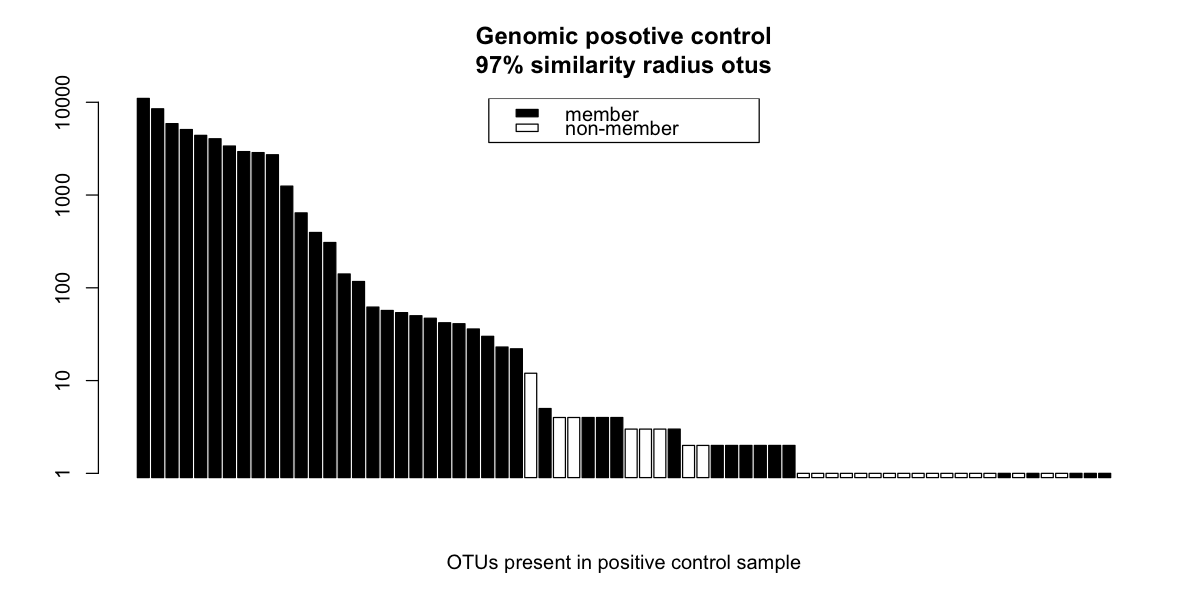

In [44]:
inout <- paste('MC', gen_97_bar$MC, sep='')
inout[inout=='MC0'] <- NA


options(repr.plot.width = 10, repr.plot.height = 5)
barplot(gen_97_bar$gen_97, names.arg = NULL, col = gen_97_bar$member,
       log = 'y', main = 'Genomic posotive control\n97% similarity radius otus',
       xlab = 'OTUs present in positive control sample')
       legend('top', legend =c('member', 'non-member'), fil = c(1,0))


In [37]:
dtab <- table(gen_97_bar$mc)
dtab <- dtab[-1]
dtab


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 22 23 24 
 8  1  1  1  1  1  2 11  2  1  1  3  1  1  1  1  1  1  1  1  1  1 

In [ ]:
## this suggests that we mc members 1, 7,8,9,and 12 were split by the bioinformatic pipeline - 

In [38]:
stackmat <- matrix(nrow = max(dtab), ncol = 24)
stackmat[] <- 0
stackmatnames <- paste('MC', 1:24, sep = '')
colnames(stackmat) <- stackmatnames

for (i in 1:24){
        bb <- gen_97_bar[gen_97_bar$mc == i,, drop=FALSE]
        for (j in 1:nrow(bb)){stackmat[j,i] <- bb$gen_97[j]}
    }

In [46]:
#stackmat <- stackmat[,-c(10,17,21)]
stackmat <- stackmat[,order(colSums(stackmat), decreasing = TRUE)]
stackmat

MC10,MC1,MC8,MC14,MC22,MC20,MC13,MC12,MC15,MC24,⋯,MC7,MC6,MC11,MC3,MC2,MC23,MC18,MC4,MC17,MC21
11007,8502,5883,5083,4399,4041,3375,2940,2868,2718,⋯,117,47,41,36,30,22,2,1,NA,NA
0,62,141,0,0,0,0,4,0,0,⋯,1,0,0,0,0,0,0,0,0,0
0,54,57,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,42,50,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,4,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,2,5,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,4,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,3,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


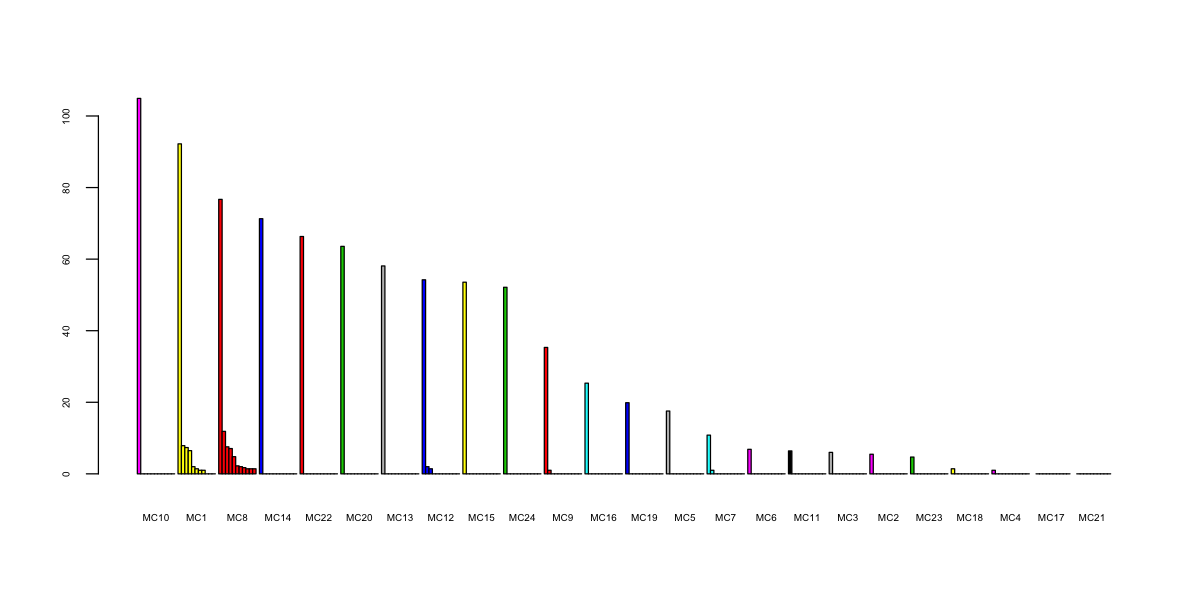

In [50]:
bcols <- rep(sample(1:ncol(stackmat), replace = FALSE, size = 21), each = nrow(stackmat))


par(cex.axis = 0.5)
barplot(sqrt(stackmat), beside = TRUE, col = bcols)
par(mfrow = c(1,1))


In [41]:
gen.97.species <- tax_table(mc.gen.biom)[names(reads),7] ## species names
gen.97.species

,Species
OTU45:14grass,NA
OTU30:5grass,NA
OTU50:14grass,Mycosphaerella_rubella_SH206848.07FU
OTU62:14grass,Ophiostoma_denticiliatum_SH303743.07FU
OTU69:24grass,NA
OTU79:26grass,Psilocybe_cyanescens_SH262625.07FU
OTU85:13grass,NA
OTU76:14grass,Penicillium_nodositatum_SH200570.07FU
OTU105:19grass,Guignardia_gaultheriae_SH186505.07FU
OTU86:26grass,NA


In [32]:
## hmmm its kind of concerning that the most abundant OTU in my mock community wasn't places there by me - I think I will
# try to run Dan's mock community through.  potential problems:  
# 1) I accidentially selected both mock samples thorugh the naming - this was true, but didn't change the problem I am having
# 2) My mock community was contaminated - this should be clear if my community is different from Dans -
# 3) the 97 radius is causing a split in one of the OTUs that we entered through the pipeline.  

In [111]:
mc.its.biom <- subset_samples(grass_biom, SampleNumber == '158')
mc.its.biom

sum(taxa_sums(mc.its.biom)[taxa_sums(mc.its.biom)>0])
length(taxa_sums(mc.its.biom)[taxa_sums(mc.its.biom)>0])

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3880 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 51 sample variables ]
tax_table()   Taxonomy Table:    [ 3880 taxa by 7 taxonomic ranks ]

[1] 45174

[1] 66

In [112]:
its_97 <- taxa_sums(mc.its.biom)[taxa_sums(mc.its.biom)>0]
its_97 <- sort(its_97, decreasing = TRUE)

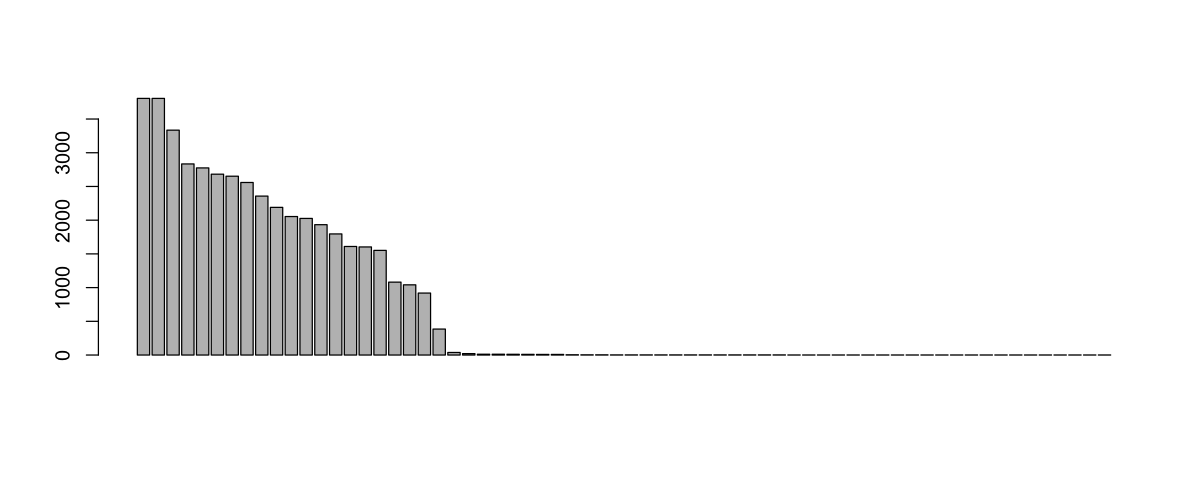

In [113]:
options(repr.plot.width = 10, repr.plot.height = 4)
barplot(its_97, names.arg = '')

In [64]:
taxa_sums(mc.its.biom)[taxa_sums(mc.its.biom)>0]

OTU1:5grass      OTU9:5grass      OTU4:5grass      OTU3:5grass 
               9                2                2                2 
    OTU30:5grass  OTU1306:80grass      OTU8:5grass      OTU6:5grass 
            3806                1                1                4 
    OTU47:6grass     OTU10:5grass    OTU166:5grass     OTU67:5grass 
               1                2                1                1 
    OTU44:5grass     OTU22:6grass     OTU15:5grass     OTU35:5grass 
               1                2             2682                2 
    OTU38:5grass     OTU42:5grass    OTU267:6grass     OTU72:6grass 
               1             2357                1                1 
    OTU34:7grass   OTU113:14grass   OTU292:87grass    OTU50:14grass 
               1                1              385             1552 
 OTU360:103grass    OTU109:7grass     OTU57:8grass    OTU86:26grass 
               2                1                2             2026 
   OTU93:14grass    OTU85:13grass   OTU189:13grass    OTU45:14grass 
            2559             1610             1081             3335 
  OTU152:53grass    OTU62:14grass    OTU76:14grass    OTU87:15grass 
            1796             2834             2652             3806 
  OTU106:15grass   OTU105:19grass    OTU69:24grass    OTU79:26grass 
            2775             1041             2190             2054 
  OTU285:27grass   OTU151:29grass  OTU1557:31grass   OTU158:39grass 
               1             1933                1             1603 
 OTU1039:56grass OTU1115:161grass  OTU221:109grass OTU1504:109grass 
              12                3              919                1 
OTU1653:161grass OTU1281:161grass OTU2457:161grass  OTU845:161grass 
              21                2                1               11 
OTU2882:161grass OTU1043:161grass  OTU831:161grass OTU3280:256grass 
               1               10               12                9 
OTU2952:162grass OTU3436:256grass OTU1300:162grass OTU3233:161grass 
               1                1               38                1 
OTU2490:162grass OTU3424:162grass OTU3881:162grass OTU3640:162grass 
               3                2                2                2 
OTU2485:162grass OTU2894:162grass 
               1                1

In [131]:
## create tesx file of otus
reads <- taxa_sums(mc.its.biom)[taxa_sums(mc.its.biom) > 0]
reads <- sort(reads, decreasing = TRUE)
sink('mc.its.names.txt')
names(reads)
sink()

[1] "OTU30:5grass"     "OTU87:15grass"    "OTU45:14grass"    "OTU62:14grass"   
 [5] "OTU106:15grass"   "OTU15:5grass"     "OTU76:14grass"    "OTU93:14grass"   
 [9] "OTU42:5grass"     "OTU69:24grass"    "OTU79:26grass"    "OTU86:26grass"   
[13] "OTU151:29grass"   "OTU152:53grass"   "OTU85:13grass"    "OTU158:39grass"  
[17] "OTU50:14grass"    "OTU189:13grass"   "OTU105:19grass"   "OTU221:109grass" 
[21] "OTU292:87grass"   "OTU1300:162grass" "OTU1653:161grass" "OTU1039:56grass" 
[25] "OTU831:161grass"  "OTU845:161grass"  "OTU1043:161grass" "OTU1:5grass"     
[29] "OTU3280:256grass" "OTU6:5grass"      "OTU1115:161grass" "OTU2490:162grass"
[33] "OTU4:5grass"      "OTU9:5grass"      "OTU3:5grass"      "OTU10:5grass"    
[37] "OTU22:6grass"     "OTU35:5grass"     "OTU360:103grass"  "OTU57:8grass"    
[41] "OTU1281:161grass" "OTU3424:162grass" "OTU3881:162grass" "OTU3640:162grass"
[45] "OTU1306:80grass"  "OTU8:5grass"      "OTU47:6grass"     "OTU166:5grass"   
[49] "OTU67:5grass"     "OTU44:5grass"     "OTU38:5grass"     "OTU267:6grass"   
[53] "OTU72:6grass"     "OTU34:7grass"     "OTU113:14grass"   "OTU109:7grass"   
[57] "OTU285:27grass"   "OTU1557:31grass"  "OTU1504:109grass" "OTU2457:161grass"
[61] "OTU2882:161grass" "OTU2952:162grass" "OTU3436:256grass" "OTU3233:161grass"
[65] "OTU2485:162grass" "OTU2894:162grass"

In [ ]:
## Run in terminal ##

#to make file run-able
# $chmod +x script_name
# to run the script, use ./ before the script name

#! /usr/bin/env python3
from sys import argv
from glob import glob
import os

mcseq_mc_its=('OTU30:5grass', 'OTU87:15grass', 'OTU45:14grass', 'OTU62:14grass',
 'OTU106:15grass', 'OTU15:5grass', 'OTU76:14grass', 'OTU93:14grass', 
 'OTU42:5grass', 'OTU69:24grass', 'OTU79:26grass', 'OTU86:26grass', 
 'OTU151:29grass', 'OTU152:53grass', 'OTU85:13grass', 'OTU158:39grass', 
 'OTU50:14grass', 'OTU189:13grass', 'OTU105:19grass', 'OTU221:109grass', 
 'OTU292:87grass', 'OTU1300:162grass', 'OTU1653:161grass', 'OTU1039:56grass', 
 'OTU831:161grass', 'OTU845:161grass', 'OTU1043:161grass', 'OTU1:5grass', 
 'OTU3280:256grass', 'OTU6:5grass', 'OTU1115:161grass', 'OTU2490:162grass', 
 'OTU9:5grass', 'OTU4:5grass', 'OTU3:5grass', 'OTU10:5grass', 'OTU22:6grass', 
 'OTU35:5grass', 'OTU360:103grass', 'OTU57:8grass', 'OTU1281:161grass', 
 'OTU3424:162grass', 'OTU3881:162grass', 'OTU3640:162grass', 'OTU1306:80grass',
  'OTU8:5grass', 'OTU47:6grass', 'OTU166:5grass', 'OTU67:5grass', 'OTU44:5grass'
  , 'OTU38:5grass', 'OTU267:6grass', 'OTU72:6grass', 'OTU34:7grass', 
  'OTU113:14grass', 'OTU109:7grass', 'OTU285:27grass', 'OTU1557:31grass', 
  'OTU1504:109grass', 'OTU2457:161grass', 'OTU2882:161grass', 'OTU2952:162grass',
   'OTU3436:256grass', 'OTU3233:161grass', 'OTU2485:162grass', 'OTU2894:162grass')

with open('otus_97_uclust_ass_tax.fasta', 'r') as zoop:
         refseq = zoop.readlines()

with open('mcseq_mc_its.txt', 'w') as goop:
         for j,otu in enumerate(mcseq_mc_its):
                 for i,line in enumerate(refseq):
                         if mcseq_mc_its[j] in line:
                                 goop.write(line)
                                 for l in refseq[i+1:i+5]:
                                         if ">" in l:
                                                 goop.write('\n')
                                                 break
                                         goop.write(l)

In [ ]:
## Shell kernel
## reformat, blast.  The two outpouts are: 1) human readable, and 2)a summary csv to use in R
sed '/^>/ s/;size=.*//' mcseq_mc_its.txt | sed '/^>/ s/;size=.*//' mcseq_mc_its.txt > mockseqs_mc_its.fasta

blastn -query mockseqs_mc_its.fasta -db mcsanger.fasta -out mcblast_mc_its.txt -num_descriptions 3 -num_alignments 3
blastn -query mockseqs_mc_its.fasta -db mcsanger.fasta -out mcblast_mc_its.csv -outfmt 10 -max_target_seqs 1

sed -i '' '1i\
qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
' mcblast_mc_its.csv 
sed -i '' 's/_ITS[1,4],/,/g' mcblast_mc_its.csv 
sed -i '' 's/Sample//g' mcblast_mc_its.csv 

In [132]:
blast <- read.csv('mcblast_mc_its.csv', stringsAsFactors=FALSE)
colnames(blast) <- c('qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore')
blast$sseqid <- gsub('Sample','',blast$sseqid)
blast$sseqid <- gsub('_ITS4','',blast$sseqid)
blast

qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
OTU30:5grass,1,99.31,144,1,0,1,144,434,291,7e-73,261
OTU87:15grass,6,100.00,184,0,0,1,184,535,352,1e-96,340
OTU45:14grass,10,100.00,174,0,0,1,174,482,309,4e-91,322
OTU62:14grass,14,100.00,197,0,0,1,197,566,370,7e-104,364
OTU106:15grass,19,100.00,175,0,0,1,175,513,339,1e-91,324
OTU15:5grass,7,100.00,193,0,0,1,193,524,332,1e-101,357
OTU76:14grass,12,100.00,178,0,0,1,178,501,324,2e-93,329
OTU93:14grass,9,100.00,176,0,0,1,176,504,329,3e-92,326
OTU42:5grass,16,100.00,180,0,0,1,180,502,323,2e-94,333
OTU69:24grass,22,100.00,168,0,0,1,168,512,345,8e-88,311


In [133]:
goodblast <- blast[blast$length > 100,]
1:24 %in% goodblast$sseqid # check for presence absence of mc

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

In [134]:
sort(unique(goodblast$sseqid)); length(unique(goodblast$sseqid))
# huh - for some reason, we recovered mc 10 here...

[1] "1"  "10" "11" "12" "13" "14" "15" "16" "18" "19" "2"  "20" "22" "23" "24"
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"

[1] 22

In [135]:
member <- names(its_97) %in% goodblast$qseqid ## danITS95 created above 
MC <- vector(length = length(its_97))
its_97bar <- data.frame(cbind(its_97, member, MC))
for (i in 1:nrow(its_97bar)){
        if (rownames(its_97bar)[i] %in% goodblast$qseqid) {
                search <- grep(rownames(its_97bar)[i], goodblast$qseqid)
                its_97bar$MC[i] <- goodblast$sseqid[search]
        }
    }

In [136]:
its_97bar

,its_97,member,MC
OTU30:5grass,3806,1,1
OTU87:15grass,3806,1,6
OTU45:14grass,3335,1,10
OTU62:14grass,2834,1,14
OTU106:15grass,2775,1,19
OTU15:5grass,2682,1,7
OTU76:14grass,2652,1,12
OTU93:14grass,2559,1,9
OTU42:5grass,2357,1,16
OTU69:24grass,2190,1,22


In [137]:
tax_table(mc.its.biom)[which(rownames(tax_table(mc.its.biom))=='OTU30:5grass')]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU30:5grass,Fungi,Ascomycota,Dothideomycetes,Dothideales,Dothideales_fam_Incertae_sedis,Phaeocryptopus,NA


In [138]:
otu_table(mc.its.biom)[which(rownames(otu_table(mc.its.biom))=='OTU30:5grass')]

,162grass
OTU30:5grass,3806


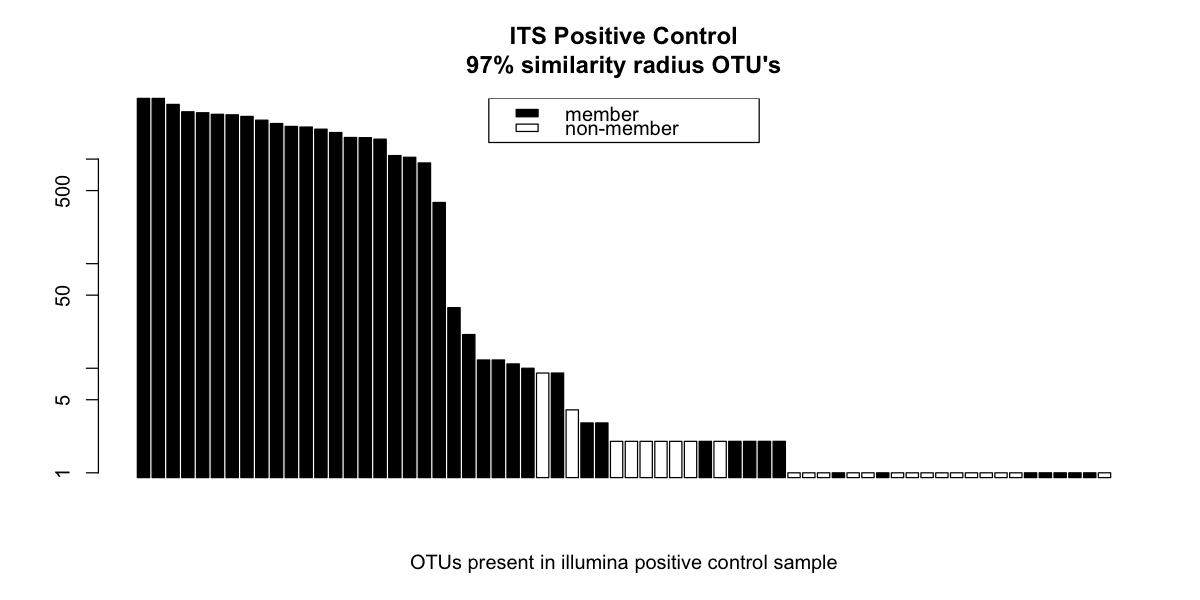

In [139]:
options(repr.plot.width = 10, repr.plot.height = 5)
barplot(its_97bar$its_97, names.arg=NULL, col = its_97bar$member,
        log = 'y', main="ITS Positive Control\n97% similarity radius OTU's",
        xlab='OTUs present in illumina positive control sample')
        legend("top", legend=c('member','non-member'), fill=c(1,0))

In [140]:
# now we can examine the tag-switching
dtab <- table(its_97bar$MC)
dtab <- dtab[-1]
dtab


 1 10 11 12 13 14 15 16 18 19  2 20 22 23 24  3  4  5  6  7  8  9 
 5  1  3  4  1  1  1  1  1  2  1  1  1  1  2  1  1  1  1  3  6  3 

In [141]:
stackmat <- matrix(nrow = max(dtab), ncol = 24)
stackmat[] <- 0
stackmatnames <- paste('MC', 1:24, sep = '')
colnames(stackmat) <- stackmatnames

for (i in 1:24){
        bb <- its_97bar[its_97bar$MC == i,, drop=FALSE]
        for (j in 1:nrow(bb)){stackmat[j,i] <- bb$its_97[j]}
    }

In [142]:
stackmat <- stackmat[,-21] ## no MC21, wasn't put into MC mix
## sort by read abundances:
stackmat <- stackmat[,order(colSums(stackmat), decreasing = TRUE)]
stackmat



MC1,MC6,MC10,MC14,MC19,MC12,MC7,MC9,MC16,MC22,⋯,MC5,MC13,MC11,MC8,MC23,MC15,MC3,MC18,MC2,MC17
3806,3806,3335,2834,2775,2652,2682,2559,2357,2190,⋯,1796,1610,1603,1552,1081,1041,919,385,3,NA
12,0,0,0,2,38,2,2,0,0,⋯,0,0,3,11,0,0,0,0,0,0
12,0,0,0,0,21,1,1,0,0,⋯,0,0,1,10,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,9,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


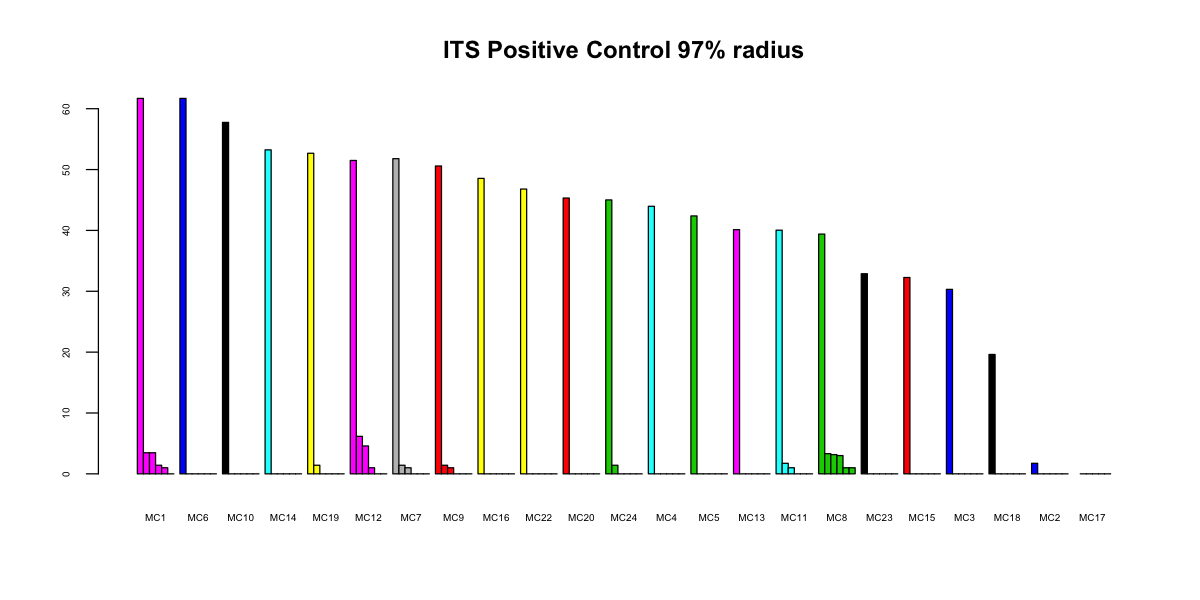

In [143]:
## make our colors from a palette. Randomize for better separation
bcols <- rep(sample(1:ncol(stackmat), replace=FALSE, size=23), each=nrow(stackmat))

par(cex.axis=.5)
## we can see our lower abundances better with sqrt:
barplot(sqrt(stackmat), beside = TRUE, col = bcols, main="ITS Positive Control 97% radius") 
par(mfrow=c(1,1))



### well, we are still seeing tag splitting -
### mc 1 and 2 are present, but at such low levels

# cleaning up the biom using positive and negative controls

#### this will follow the general work flow - remove low abundance samples, 


## removing low abundance samples

In [144]:
sample_sums(grass_biom)[sample_sums(grass_biom) < 2000]

255grass 
    1745

In [ ]:
## re-examine mock community tag switching


In [145]:
dtab <- table(gen_97_bar$mc)
dtab <- dtab[-1]
dtab


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 22 23 24 
 8  1  1  1  1  1  2 11  2  1  1  3  1  1  1  1  1  1  1  1  1  1 

In [146]:
stackmat <- matrix(nrow = max(dtab), ncol = 24)
stackmat[] <- 0
stackmatnames <- paste('MC', 1:24, sep = '')
colnames(stackmat) <- stackmatnames

for (i in 1:24){
        bb <- gen_97_bar[gen_97_bar$mc == i,, drop=FALSE]
        for (j in 1:nrow(bb)){stackmat[j,i] <- bb$gen_97[j]}
    }

In [162]:
stackmat <- stackmat[,-21] ## no MC21, wasn't put into MC mix
## sort by read abundances:
stackmat <- stackmat[,order(colSums(stackmat), decreasing = TRUE)]
stackmat


MC10,MC1,MC8,MC14,MC22,MC20,MC13,MC12,MC15,MC24,⋯,MC5,MC7,MC6,MC11,MC3,MC2,MC23,MC18,MC4,MC17
11007,8502,5883,5083,4399,4041,3375,2940,2868,2718,⋯,308,117,47,41,36,30,22,2,1,NA
0,62,141,0,0,0,0,4,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0,54,57,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,42,50,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,4,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,2,5,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,4,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,3,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
## looks like we are seeing varying degrees of tag-switching - the most prevelent is 
# 2.4% in mc 8.  Becides that, all observed events are below 1%

In [43]:
smShort <- stackmat ## rerun genomic control code above to get this. 
smShort[smShort > 150] <- 150
#save(smShort, file='posGtrun.rda')

svg(file='mc_trunc_biom.svg')
barplot(smShort, beside = TRUE, main="Graham genomic positive Control 97% radius") 
par(mfrow=c(1,1))
dev.off()


pdf 
  2

In [163]:
## mc 8 seems really bad - one of the switching events yeilded 141 reads, and there are 12 events...
# lets see what it is
tax_table(mc.gen.biom)[which(rownames(tax_table(mc.gen.biom))=='OTU50:14grass')]


,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU50:14grass,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Mycosphaerellaceae,Mycosphaerella,Mycosphaerella_rubella_SH206848.07FU


In [ ]:
## okay, lets see what the negative control looks like...

In [148]:
Neg97bar

,reads,member,MC,Genus,Species
OTU95:14grass,4803,FALSE,0,NoID,NoID
OTU42:5grass,3810,TRUE,16,Xylaria,NoID
OTU273:158grass,1437,FALSE,0,NoID,NoID
OTU278:64grass,1318,FALSE,0,NoID,NoID
OTU87:15grass,1172,TRUE,6,Trametes,NoID
OTU339:148grass,1014,FALSE,0,NoID,NoID
OTU459:163grass,672,FALSE,0,Dentipellis,Dentipellis_fragilis_SH190187.07FU
OTU323:7grass,667,FALSE,0,Penicillium,Penicillium_bialowiezense_SH199400.07FU
OTU477:40grass,644,FALSE,0,Phlebiopsis,Phlebiopsis_gigantea_SH198804.07FU
OTU484:95grass,532,FALSE,0,NoID,NoID


In [149]:
dtabN <- table(Neg97bar$MC)
dtabN <- dtabN[-1]
dtabN


 6  7  8 12 16 19 
 1  1  1  1  1  1 

In [157]:
## there are 6 mock community members present in the negative control - the problematic ones are
# mc 16 and mc 6 - both have over 1000 reads... I don't know how to treat these becides making the 
# call that they must be contaminants instead of instances of tag switching.  Otherwize I 
# would reduce my observations to an unacceptable low.

## that still leaves me with the issue of what to do concerning the tag-switching observed in my
# mock community.  the max value for the genomic mock is 141 reads - 